**INF2178 Assignment 4**\
**Chenyang Pan**\
**1005131554**

In [1]:
# run this code to upload the data
from google.colab import files
files_upload = files.upload()

Saving INF2178_A4_data.csv to INF2178_A4_data.csv


In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
%pip install bioinfokit
from bioinfokit.analys import stat
!pip install pingouin
import pingouin as pg

In [19]:
# read in the Dementia data into dataframe
MRI_df = pd.read_csv('INF2178_A4_data.csv')

# **Data Examination and Cleaning**

In [20]:
# preview of the  data
MRI_df.head(6)

,Unnamed: 0,Subject ID,MRI ID,Group,Visit,MR Delay,M/F,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,0,OAS2_0001,OAS2_0001_MR1,Nondemented,1,0,M,R,87,14,2.0,27.0,0.0,1987,0.696,0.883
1,1,OAS2_0001,OAS2_0001_MR2,Nondemented,2,457,M,R,88,14,2.0,30.0,0.0,2004,0.681,0.876
2,2,OAS2_0002,OAS2_0002_MR1,Demented,1,0,M,R,75,12,NaN,23.0,0.5,1678,0.736,1.046
3,3,OAS2_0002,OAS2_0002_MR2,Demented,2,560,M,R,76,12,NaN,28.0,0.5,1738,0.713,1.010
4,5,OAS2_0004,OAS2_0004_MR1,Nondemented,1,0,F,R,88,18,3.0,28.0,0.0,1215,0.710,1.444
5,6,OAS2_0004,OAS2_0004_MR2,Nondemented,2,538,F,R,90,18,3.0,27.0,0.0,1200,0.718,1.462


In [21]:
# only keep revelant columns
MRI_df.drop(['MRI ID'	, "Unnamed: 0", 'ASF','CDR', 'eTIV', 'MR Delay',
             'M/F',	'Hand', 'Age',	'EDUC',	'SES'], axis=1,  inplace = True)
#remove NA terms
MRI_df.dropna(inplace = True)
MRI_df['Visit'] = MRI_df['Visit'].replace(1, 'First visit')
MRI_df['Visit'] = MRI_df['Visit'].replace(2, 'Second visit')

In [22]:
# view cleaned data
MRI_df.head(5)

,Subject ID,Group,Visit,MMSE,nWBV
0,OAS2_0001,Nondemented,First visit,27.0,0.696
1,OAS2_0001,Nondemented,Second visit,30.0,0.681
2,OAS2_0002,Demented,First visit,23.0,0.736
3,OAS2_0002,Demented,Second visit,28.0,0.713
4,OAS2_0004,Nondemented,First visit,28.0,0.710


# ****Exploratory Data Analysis (EDA)****

In [23]:
# count for each visit times
MRI_df['count'] = 1
MRI_df.pivot_table(values='count', index='Visit', aggfunc='sum')

,count
Visit,
First visit,150
Second visit,143


Text(0.5, 0, 'Group')

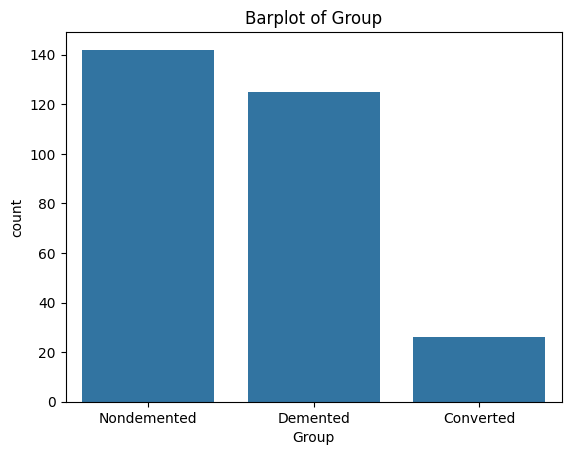

In [24]:
# barplot of demented and undemented people
sns.countplot(data= MRI_df, x='Group',)
plt.title('Barplot of Group')
plt.xlabel('Group')

In [25]:
# code refers to INF2178 Lecture
# numerical summary statistic of dataset assoicated with type
def get_summary_statistics(dataset, type):

    mean = np.round(np.mean(dataset), 3)
    median = np.round(np.median(dataset), 3)
    min_value = np.round(dataset.min(), 3)
    max_value = np.round(dataset.max(), 3)
    quartile_1 = np.round(dataset.quantile(0.25), 3)
    quartile_3 = np.round(dataset.quantile(0.75), 3)
    spread = max_value-min_value
    sd = np.round(dataset.std(), 3)

    # Interquartile range
    iqr = np.round(quartile_3 - quartile_1, 3)

    print('\n\n{} summary statistics'.format(type))
    print('Min: %s' % min_value)
    print('Mean: %s' % mean)
    print('Max: %s' % max_value)
    print('spread: %s' % spread)
    print('25th percentile: %s' % quartile_1)
    print('Median: %s' % median)
    print('standard deviation: %s' % sd)
    print('75th percentile: %s' % quartile_3)
    print('Interquartile range (IQR): %s' % iqr)

In [26]:
# summary statistics for MMSE score in demented group
de_MMSE = MRI_df[MRI_df['Group'] == "Demented"]['MMSE']
get_summary_statistics(de_MMSE, 'MMSE score in demented group')



MMSE score in demented group summary statistics
Min: 15.0
Mean: 24.8
Max: 30.0
spread: 15.0
25th percentile: 22.0
Median: 26.0
standard deviation: 3.908
75th percentile: 28.0
Interquartile range (IQR): 6.0


In [27]:
# summary statistics for MMSE score in nondemented group
nonde_MMSE = MRI_df[MRI_df['Group'] == "Nondemented"]['MMSE']
get_summary_statistics(nonde_MMSE, 'MMSE score in nondemented group')



MMSE score in nondemented group summary statistics
Min: 26.0
Mean: 29.155
Max: 30.0
spread: 4.0
25th percentile: 29.0
Median: 29.0
standard deviation: 0.902
75th percentile: 30.0
Interquartile range (IQR): 1.0


In [28]:
# summary statistics for MMSE score in converted group
con_MMSE = MRI_df[MRI_df['Group'] == "Converted"]['MMSE']
get_summary_statistics(con_MMSE, 'MMSE score in Converted group')



MMSE score in Converted group summary statistics
Min: 24.0
Mean: 28.731
Max: 30.0
spread: 6.0
25th percentile: 28.0
Median: 29.0
standard deviation: 1.687
75th percentile: 30.0
Interquartile range (IQR): 2.0


In [29]:
# summary statistics for nWBV score in demented group
de_nWBV = MRI_df[MRI_df['Group'] == "Demented"]['nWBV']
get_summary_statistics(de_nWBV, 'nWBVscore in demented group')



nWBVscore in demented group summary statistics
Min: 0.646
Mean: 0.719
Max: 0.806
spread: 0.16000000000000003
25th percentile: 0.695
Median: 0.715
standard deviation: 0.033
75th percentile: 0.741
Interquartile range (IQR): 0.046


In [30]:
# summary statistics for nWBV score in nondemented group
nonde_nWBV = MRI_df[MRI_df['Group'] == "Nondemented"]['nWBV']
get_summary_statistics(nonde_nWBV, 'nWBV score in nondemented group')



nWBV score in nondemented group summary statistics
Min: 0.663
Mean: 0.742
Max: 0.837
spread: 0.17399999999999993
25th percentile: 0.716
Median: 0.739
standard deviation: 0.039
75th percentile: 0.769
Interquartile range (IQR): 0.053


In [31]:
# summary statistics for nWBV score in converted group
con_nWBV = MRI_df[MRI_df['Group'] == "Converted"]['nWBV']
get_summary_statistics(con_nWBV, 'nWBV score in Converted group')



nWBV score in Converted group summary statistics
Min: 0.677
Mean: 0.733
Max: 0.799
spread: 0.122
25th percentile: 0.711
Median: 0.725
standard deviation: 0.034
75th percentile: 0.759
Interquartile range (IQR): 0.048


<Axes: xlabel='Visit', ylabel='MMSE'>

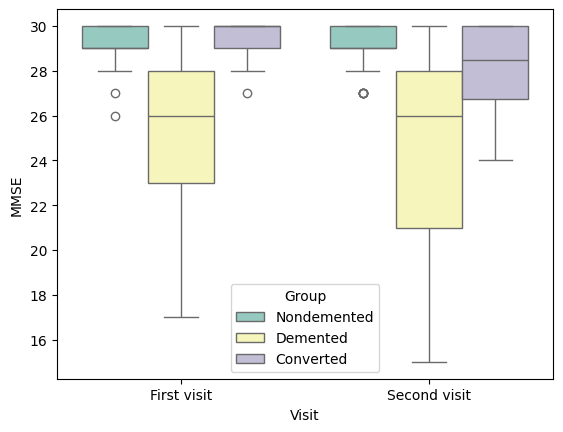

In [32]:
# boxplot of MMSE of first and second visit group by group
sns.boxplot(x="Visit", y="MMSE", hue="Group",data= MRI_df, palette="Set3")

<Axes: xlabel='Visit', ylabel='nWBV'>

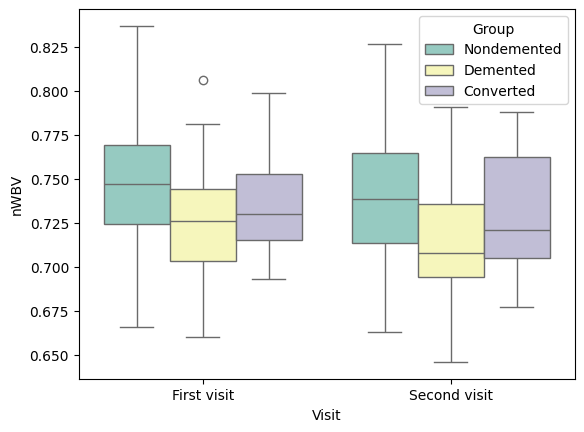

In [33]:
# boxplot of nWBV of first and second visit group by group
sns.boxplot(x="Visit", y="nWBV", hue="Group",data= MRI_df, palette="Set3")

<ipython-input-34-b0028467ca9b>:3: FutureWarning: 

The `errwidth` parameter is deprecated. And will be removed in v0.15.0. Pass `err_kws={'linewidth': 1}` instead.

  sns.pointplot(data=MRI_df, x='Visit', y='MMSE', hue='Group', dodge=True,


<Axes: xlabel='Visit', ylabel='MMSE'>

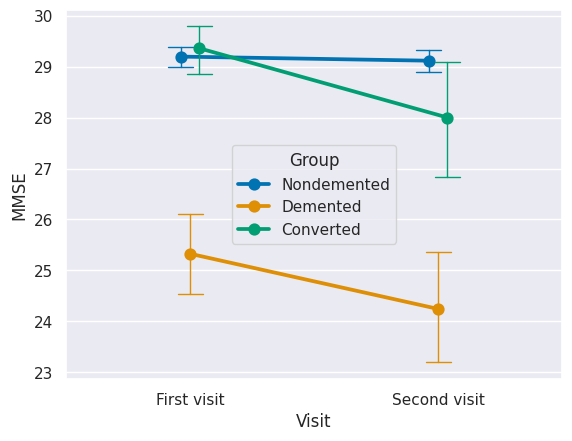

In [34]:
# plot the point relation plot to see MMSE changes from first vist to second visit based on groups
sns.set()
sns.pointplot(data=MRI_df, x='Visit', y='MMSE', hue='Group', dodge=True,
	      capsize=.1, errwidth=1, palette='colorblind')

<ipython-input-35-706031fae5e0>:3: FutureWarning: 

The `errwidth` parameter is deprecated. And will be removed in v0.15.0. Pass `err_kws={'linewidth': 1}` instead.

  sns.pointplot(data=MRI_df, x='Visit', y='nWBV', hue='Group', dodge=True,


<Axes: xlabel='Visit', ylabel='nWBV'>

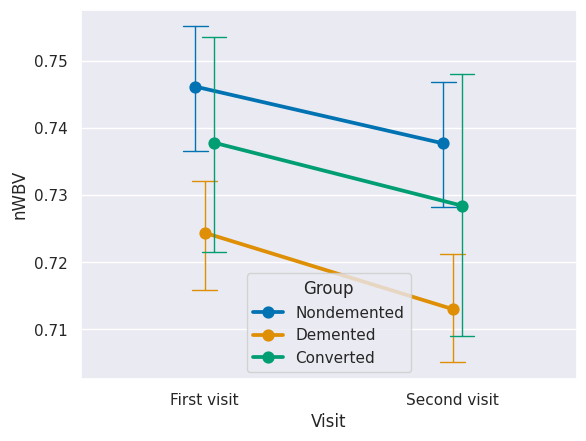

In [35]:
# plot the point relation plot to see nWBV changes from first vist to second visit based on groups
sns.set()
sns.pointplot(data=MRI_df, x='Visit', y='nWBV', hue='Group', dodge=True,
	      capsize=.1, errwidth=1, palette='colorblind')

**Narrative About the Data**

We first had a preview of the dataset and found that there 16 features in total. Since our goal in this analysis is to explore how  the MMSE score and nWBV change over time , from first visit to second visit in demented group compared to nondemented group and converted group, these only 5 variables are left to make further analysis, which are the subject ID, group, Visit, MMSE and nWBV. Moreover, in the data cleaning section, the values in Visit are renamed to First visit or Second visit depending on whether the original value is 1 or 2. Doing so, the expression is more clear. Na terms are dropped.

During EDA, I first counted the number of visits for the first and second visit, and found that 150 people have gone to the first visit, but only 147 people have gone to the second visit. TGis tells us that some of the people only visit once. Then, I also made a barplot showing the distribution of groups showing the number of people in demented, nondemented and converted groups. I found that the nondemented group has a similar amount compared to the demented with slightly higher and converted has the lowest. Then I made the summary statistics for MMSE score by groups and found that the nondemented group has the highest average MMSE score followed by the converted group. Also the nondemented group has the lowest spread and standard deviation telling us that the MMSE score in the nondemented group is more stable. For nWBV summary statistics, similarly, the nondemented group has the highest mean nWBV score. Then I made two side by side boxplots,the first one is the MMSE score for the first and second visit group by the dementia group. We can observe a large distinction, larger spread and lower median,  between the demented group compared to the other two. The second boxplot is the nWBV score for the first and second visit group by the dementia group, the distinction in the previous boxplot is so obvious in nWBV, but we can still see the demented people showing lower nWBV score than the other two groups. Lastly I made two pointplot from the first visit to the second visit separated the three groups for MMSE and nWBV. What has been found is inspiring, for MMSE, the nondemented group has a steep negative slope compared to nondemented, an almost flat slope, telling us the rapid decay over time of MMSE score in demented group. However, for nWBV, the three slopes are similar, which may infer that whether or not having dementia does not impact too much on normalized whole brain volume.


# ****Two Way Mixed Effect ANOVA****

In [36]:
# First Model: the two-way mixed-design ANOVA for MMSE
aov = pg.mixed_anova(dv='MMSE', within='Visit', between='Group',subject='Subject ID', data= MRI_df)
# printing of ANOVA summary
pg.print_table(aov)


ANOVA SUMMARY

Source             SS    DF1    DF2       MS       F    p-unc    np2      eps
-----------  --------  -----  -----  -------  ------  -------  -----  -------
Group        1328.421      2    140  664.211  56.212    0.000  0.445  nan
Visit          22.378      1    140   22.378   8.859    0.003  0.060    1.000
Interaction    17.000      2    140    8.500   3.365    0.037  0.046  nan



In [37]:
# First Model: post hoc test
posthocs = pg.pairwise_ttests(dv='MMSE', within='Visit', between='Group',
                              subject='Subject ID', data= MRI_df)
pg.print_table(posthocs)


POST HOC TESTS

Contrast       Visit         A            B             Paired    Parametric         T      dof  alternative      p-unc                BF10    hedges
-------------  ------------  -----------  ------------  --------  ------------  ------  -------  -------------  -------  ------------------  --------
Visit          -             First visit  Second visit  True      True           2.928  142.000  two-sided        0.004               5.530     0.162
Group          -             Converted    Demented      False     True           6.739   51.065  two-sided        0.000         2036000.000     1.167
Group          -             Converted    Nondemented   False     True          -1.303   12.315  two-sided        0.216               0.599    -0.584
Group          -             Demented     Nondemented   False     True          -9.449   64.318  two-sided        0.000  22070000000000.000    -1.754
Visit * Group  First visit   Converted    Demented      False     True           8.

/usr/local/lib/python3.10/dist-packages/pingouin/pairwise.py:28: UserWarning: pairwise_ttests is deprecated, use pairwise_tests instead.
  warnings.warn("pairwise_ttests is deprecated, use pairwise_tests instead.", UserWarning)


In [38]:
# First model: Assumption check
#mauchly's test of spericity
pg.sphericity(data=MRI_df, dv='MMSE', subject='Subject ID', within='Visit')[-1]

1.0

In [39]:
# normality
pg.normality(data= MRI_df, dv='MMSE', group='Visit')

,W,pval,normal
Visit,,,
First visit,0.787462,1.761304e-13,False
Second visit,0.760728,5.430693e-14,False


In [40]:
# Second Model: the two-way mixed-design ANOVA for nWBV
aov = pg.mixed_anova(dv='nWBV', within='Visit', between='Group',subject='Subject ID', data= MRI_df)
# Pretty printing of ANOVA summary
pg.print_table(aov)


ANOVA SUMMARY

Source          SS    DF1    DF2     MS       F    p-unc    np2      eps
-----------  -----  -----  -----  -----  ------  -------  -----  -------
Group        0.034      2    140  0.017   6.800    0.002  0.089  nan
Visit        0.007      1    140  0.007  97.523    0.000  0.411    1.000
Interaction  0.000      2    140  0.000   1.786    0.171  0.025  nan



In [41]:
# Second Model: post hoc test
posthocs = pg.pairwise_ttests(dv='nWBV', within='Visit', between='Group',
                              subject='Subject ID', data= MRI_df)
pg.print_table(posthocs)


POST HOC TESTS

Contrast       Visit         A            B             Paired    Parametric         T      dof  alternative      p-unc                 BF10    hedges
-------------  ------------  -----------  ------------  --------  ------------  ------  -------  -------------  -------  -------------------  --------
Visit          -             First visit  Second visit  True      True           9.821  142.000  two-sided        0.000  505100000000000.000     0.257
Group          -             Converted    Demented      False     True           1.426   14.781  two-sided        0.175                0.688     0.476
Group          -             Converted    Nondemented   False     True          -0.648   15.832  two-sided        0.527                0.361    -0.188
Group          -             Demented     Nondemented   False     True          -3.718  128.746  two-sided        0.000               81.736    -0.639
Visit * Group  First visit   Converted    Demented      False     True       

/usr/local/lib/python3.10/dist-packages/pingouin/pairwise.py:28: UserWarning: pairwise_ttests is deprecated, use pairwise_tests instead.
  warnings.warn("pairwise_ttests is deprecated, use pairwise_tests instead.", UserWarning)


In [42]:
# Second model: Assumption check
#mauchly's test of spericity
pg.sphericity(data=MRI_df, dv='nWBV', subject='Subject ID', within='Visit')[-1]

1.0

In [43]:
# normality
pg.normality(data= MRI_df, dv='nWBV', group='Visit')

,W,pval,normal
Visit,,,
First visit,0.990075,0.372060,True
Second visit,0.989271,0.341162,True


In [44]:
# calculating approporate sample size
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.stats.power import TTestIndPower
import scipy.stats
import statsmodels.stats.power as smp
import matplotlib.pyplot as plt


# calculating approporate sample size
# perform power analysis to get sample size
effectSize = 0.7

obj = TTestIndPower()
sampleSize = obj.solve_power(effect_size= effectSize, alpha= 0.05, power= 0.91,
					ratio=1, alternative='two-sided')

# round up from estimated sample size
sampleSize = np.int64(np.ceil(sampleSize))
print("the appropriated sample size is {}".format(sampleSize))

the appropriated sample size is 46


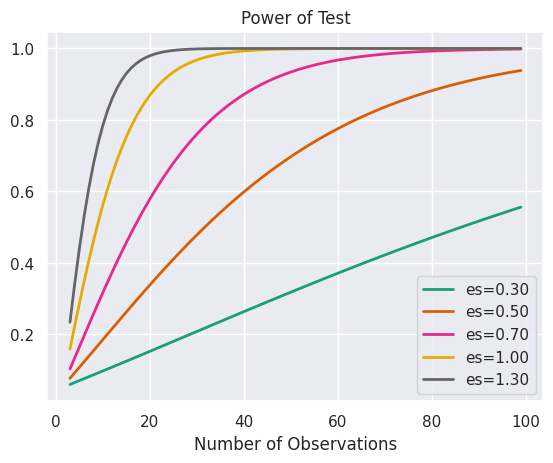

In [45]:
# power analysis varying parameters
effect_sizes = np.array([0.3, 0.5, 0.7, 1.0, 1.3])
sample_sizes = np.array(range(3, 100))

# plot power curves
obj = TTestIndPower()
obj.plot_power(dep_var='nobs', nobs=sample_sizes,
			effect_size=effect_sizes)

plt.show()